In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('utils.py').read())
print('Loaded')

Loaded


"Frontier lab" is defined as an AI company that has trained a model with an amount of compute that's within one order of magnitude of the world leading model (world leading in terms of most training compute).

## How many frontier labs by EOY 2030? ##


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3351.29it/s]


Writing cache to file `caches/n_labs.sqcache.npy`...
...Cached
{1: 5,
 5: 6,
 10: 7,
 20: 9,
 30: 10,
 40: 11,
 50: 13,
 60: 14,
 70: 18,
 80: 24,
 90: 30,
 95: 36,
 99: 59}


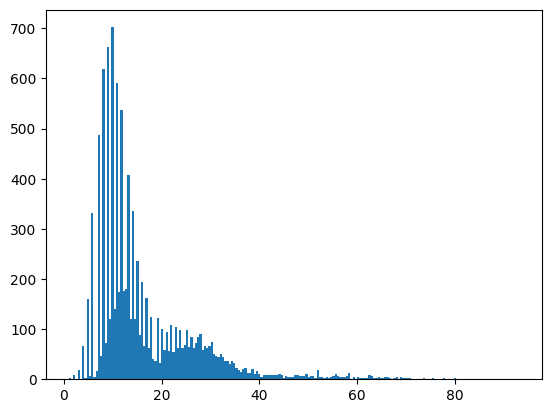

In [2]:
RUNS = 10*K

p_merger = 0.05
p_weak_catchup = 0.4 # Enough of a catchup for Meta, Yandex, Hugging Face, etc., to become frontier
p_strong_catchup = 0.2 # Enough of a catchup for open source to become frontier


def model_n_labs(end_year):
    n_labs = 4
    lab_creation_rate = sq.norm(4, 10, lclip=1) / 8
    labs_going_out_of_business_rate = sq.norm(1, 5, lclip=1) / 40
    china_back_date = int(np.round(~sq.lognorm(5, 15))) + 2023
    
    if sq.event(p_weak_catchup):
        n_labs += sq.norm(2, 4)
        
    if sq.event(p_strong_catchup):
        n_labs += sq.norm(3, 10)
        lab_creation_rate *= 3
        labs_going_out_of_business_rate *= 3
    
    for y in range(2023, end_year):
        if y == china_back_date:
            n_labs *= 2
            
        n_labs += sq.poisson(~lab_creation_rate)
        n_labs -= sq.poisson(~labs_going_out_of_business_rate)
        if sq.event(p_merger):
            n_labs -= 1
            
    return n_labs
    
    
print('## How many frontier labs by EOY 2030? ##')
n_lab_samples = sq.sample(lambda: model_n_labs(2030), n=RUNS, verbose=True, dump_cache_file='caches/n_labs')
pprint(sq.get_percentiles(n_lab_samples, digits=0))
plt.hist(n_lab_samples, bins=200)
plt.show()

In [3]:
np.mean([n > 10 for n in n_lab_samples])

0.6738

## How many frontier labs by EOY 2026? ##


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:01<00:00, 8922.52it/s]


{1: 3,
 5: 4,
 10: 5,
 20: 6,
 30: 7,
 40: 7,
 50: 8,
 60: 9,
 70: 10,
 80: 13,
 90: 19,
 95: 22,
 99: 25}


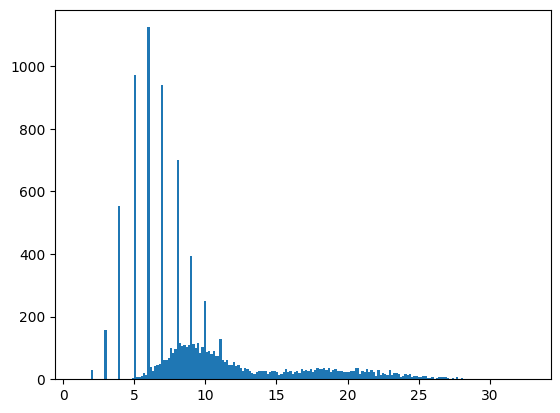

In [4]:
print('## How many frontier labs by EOY 2026? ##')
n_lab_samples_2026 = sq.sample(lambda: model_n_labs(2026), n=RUNS, verbose=True)
pprint(sq.get_percentiles(n_lab_samples_2026, digits=0))
plt.hist(n_lab_samples_2026, bins=200)
plt.show()